In [1]:
# note on high redshift standardizable candles

In [2]:
%matplotlib notebook

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
# print(os.path.basename('/abc/cde/asdfs.pdf'))
# print(os.path.dirname('/abc/sf/fcde/asdfs.pdf'))

In [5]:
#from MyUnit import NaturalUnit
import numpy as np
import sys,os
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.integrate import quad

#path = '/home/chensun/tomerv_storage/quasars_master/'
#sys.path.insert(0, path)
import igm as ig
import data as dt
import chi2 as ch
import cosmo as co

from ag_probs import omega_plasma

In [6]:
# OPTIONAL: import the a2a3 best fit
# used to compare with the axion fit. 
# This is just the a2a3 branch of the same repository

path = '/home/chen/Code/'
sys.path.insert(0, path)
from quasars_a2a3 import igm as ig_a23
from quasars_a2a3 import data as dt_a23
from quasars_a2a3 import chi2 as ch_a23
from quasars_a2a3 import cosmo as co_a23

# Load the data

In [7]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=0.,
                       Gamma_up=100.)
                       
(qso_name_raw_arr,
 qso_z_raw_arr,
 qso_f2500_raw_arr,
 qso_df2500_raw_arr,
 qso_f2keV_raw_arr,
 qso_df2keV_low_raw_arr,
 qso_df2keV_up_raw_arr,
 qso_Gamma_raw_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [8]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=1.2,
                       Gamma_up=100)
(qso_name_arr,
 qso_z_arr,
 qso_f2500_arr,
 qso_df2500_arr,
 qso_f2keV_arr,
 qso_df2keV_low_arr,
 qso_df2keV_up_arr,
 qso_Gamma_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [9]:
pan_data = dt.load_pantheon('./likelihoods',
                   'lcparam_full_long.dat',
                   'sys_full_long.dat',
                   1048,
                   True)

In [10]:
ch.use_loglkl = True
ch_a23.use_loglkl = True

In [11]:
# constructe the kwargs
# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

pan_kwargs = {'B': 1,
              'mg': omega_plasma(1.6e-8),
              's': 1,
              'omega': 1, # [eV]
              'axion_ini_frac': 0.,
              'smoothed': False,
              'redshift_dependent': True,
              'method': 'simps',
              'prob_func': 'norm_log',
              'Nz': 101,
              'skip_LumMod': False}

# Check the fit variable directly

-144.3865492663111


<IPython.core.display.Javascript object>


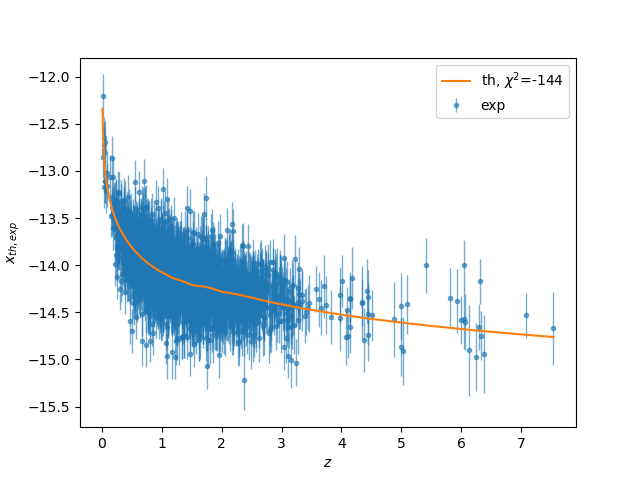

In [12]:
# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta0, \
# qso_beta1, qso_z0, qso_delta)
# x = (_, _, 0.7, 3.37, 3.09, -5.5, 0.62, 7.66, 0.23)

# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.0, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.08)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 8)


OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68211518,   0.67408777, -13.06924146, -10.09478038, 0.62760049,   7.60214181,   0.22578225])

x = (10**logma, 10**logga, OmL, h0, -0.999999, -0.999999, qso_gamma, qso_beta, 0., 100., qso_delta)




(chi2, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2)

plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.6)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='th, $\chi^2$=%.0f' %chi2)


#plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

In [13]:
help(ch_a23.chi2_quasars)

Help on function chi2_quasars in module quasars_a2a3.chi2:

chi2_quasars(x, data=None, vectorize=True, full_output=False, dm_output=False, **kwargs)
    Computes quasars chi2.     **kwargs contain the arguments for LumMod.
    
    :param x: the theory point that contains (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)
    :param data: must be have certain structures. See source code for the structure needed.
    :param vectorize: whether to vectorize the computation
    :param full_output: whether to output other quantities besides chi2, useful for testing.
    :param dm_output: whether to output the distance modulus and its error bar



-142.9001534443872


<IPython.core.display.Javascript object>


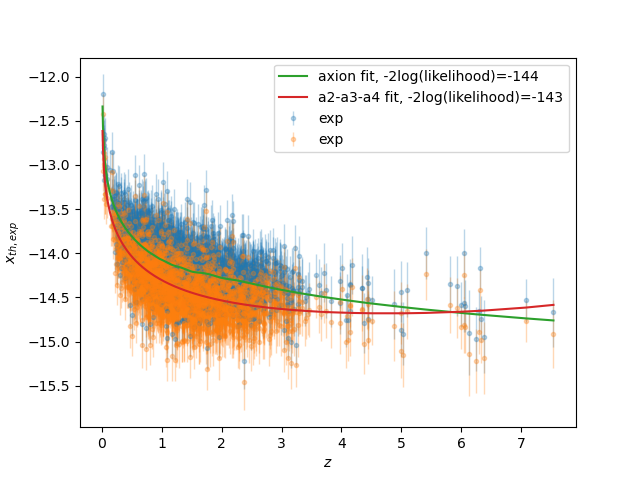

In [14]:
# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)

# Lusso's best fit with SNe + quasars
# x = (_, _, 0.7, 3.37, 3.09, -3.5, 0.62, 7.66, 0.23)

# our best fit (large a4 range)
a2, a3, a4, h0, M0, qso_gamma, qso_beta, qso_delta = \
tuple([  3.03628631,   5.1205381 ,  -8.22939399,   0.70916448,
       -19.33086951,   0.61896352,   7.67155186,   0.22593313])
x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)


ch_a23.use_loglkl = True

(chi2_1, 
 mu_th_1_arr, 
 mu_exp_1_arr, 
 sigma_1_arr,
 qso_z_1_arr) = ch_a23.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_1)

plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
plt.errorbar(qso_z_1_arr, mu_exp_1_arr, sigma_1_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='axion fit, -2log(likelihood)=%.0f' %chi2)

x, y = zip(*sorted(zip(qso_z_1_arr, mu_th_1_arr)))
plt.plot(x, y, '-', zorder=10, label='a2-a3-a4 fit, -2log(likelihood)=%.0f' %chi2_1)



#plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

# Distance Modulus

<IPython.core.display.Javascript object>


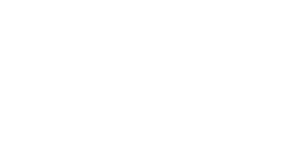

No handles with labels found to put in legend.


In [15]:
dm_fig, dm_ax = plt.subplots()
plt.ylabel('$\mu_{th, exp}$')
plt.xlabel('$z$')
plt.legend()
plt.close()

<IPython.core.display.Javascript object>


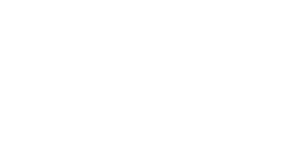

<IPython.core.display.Javascript object>


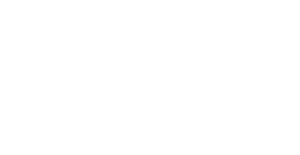

<IPython.core.display.Javascript object>


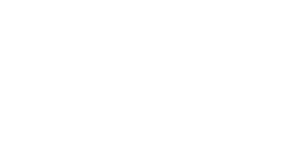

<IPython.core.display.Javascript object>


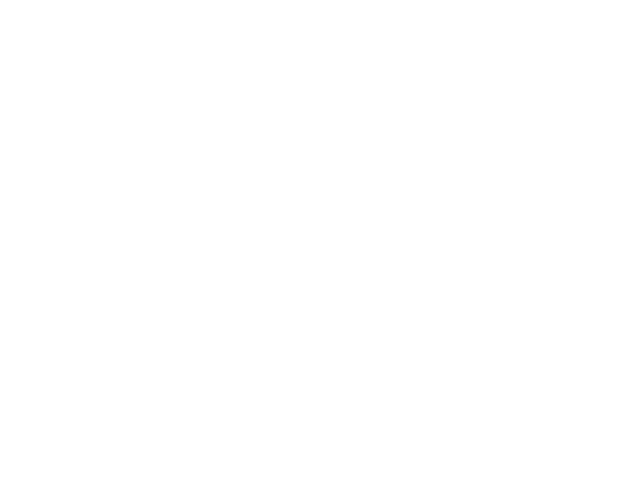

<IPython.core.display.Javascript object>


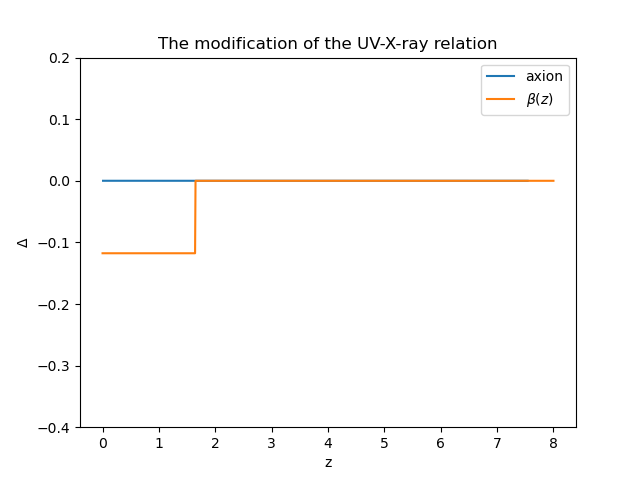

<function matplotlib.pyplot.close(fig=None)>

In [16]:
residual_fig, residual_ax = plt.subplots()
#plt.title(r"residual")
plt.title(r'The residual using QSO data w/ best fit $\beta, \gamma$')
plt.ylabel('$\sigma$')
plt.xlabel('$z$')
plt.close()

# residual2_fig, residual2_ax = plt.subplots()
# # plt.title('a4 from Lusso, PAN+QSO')
# # plt.title('a4 larger range, PAN+QSO')
# plt.title(r"residual")
# plt.ylabel('$\sigma$')
# plt.xlabel('$z$')
# plt.close()

# residual3_fig, residual3_ax = plt.subplots()
# # plt.title('a4 from Lusso, PAN+QSO')
# # plt.title('a4 larger range, PAN+QSO')
# # plt.title(r"residual")
# plt.ylabel('$\sigma$')
# plt.xlabel('$z$')
# plt.close()

residual_pan_fig, residual_pan_ax = plt.subplots()
plt.title(r'The (unnormalized) residual using PAN data$')
plt.ylabel('$\mu^{th}-\mu^{exp}$')
plt.xlabel('$z$')
plt.close()

residual_unnorm_fig, residual_unnorm_ax = plt.subplots()
plt.title(r'The (unnormalized) residual using QSO data w/ best fit $\beta, \gamma$')
plt.ylabel('$\mu^{th}-\mu^{exp}$')
plt.xlabel('$z$')
plt.close()

residual_LCDM_fig, residual_LCDM_ax = plt.subplots()
plt.title(r'The residual compared with $\mu_{\rm LCDM}$ from Planck 2018')
plt.ylabel('$\mu^{th}-\mu^{exp}$')
plt.xlabel('$z$')
plt.close()

feature_fig, feature_ax = plt.subplots()
#plt.title('The non-$\Lambda CDM$ feature')
plt.title('The modification of the UV-X-ray relation')
plt.ylabel(r'$\Delta$')
plt.xlabel(r"z")
plt.close

In [17]:
def binning(y, dyraw, delta=0):
    dy = np.sqrt(dyraw**2 + delta**2)
    dybar = 1/np.sqrt(np.sum(1/dy**2))
    ybar = np.sum(y/dy**2) * dybar**2
    return ybar, dybar

bins_lowz = np.arange(0.01, 2, 0.1) 
bins_midz = np.arange(2., 6., 0.5)
bins_highz = np.arange(6, 10, 1.)
bins = np.concatenate((bins_lowz, bins_midz, bins_highz))


In [18]:
#bins_pan = np.arange(0.01, 3., 0.1)
#bins_lowz = np.arange(0.01, 0.2, 0.05) 
bins_lowz = np.arange(0.01, 0.2, 0.02) 
bins_midz = np.arange(0.2, 1, 0.04) 
bins_highz = np.arange(1., 3., 0.3)
bins_pan = np.concatenate((bins_lowz, bins_midz, bins_highz))

# bins_lowz = np.arange(0.01, 0.2, 0.02) 
# bins_midz = np.arange(0.2, 1, 0.02) 
# bins_highz = np.arange(1., 3., 0.2)
# bins_pan = np.concatenate((bins_lowz, bins_midz, bins_highz))


# $\Lambda CDM$

In [19]:
h0_plk = 0.6736
OmL_plk= 0.6847
w0_plk = -1.
wa_plk = 0.
#co.distance_modulus(z=1., h0=h0, OmL=OmL, w0=w0, wa=wa)
z_arr = np.logspace(-2, np.log10(8), 1000)
dm_lcdm_arr = np.array([co.distance_modulus(z=z, 
                                            h0=h0_plk, 
                                            OmL=OmL_plk, 
                                            w0=w0_plk, 
                                            wa=wa_plk) for z in z_arr])
dm_ax.plot(z_arr, dm_lcdm_arr,
           'k-', zorder=1, label='LCDM, Planck 2018')

# a2a3a4 fit

In [20]:
# do distance modulus instead, so that the data points don't shift (right?)


# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)
# -Lusso's best fit with SNe + quasars-

# previous fit (small a4 range)
#x = (_, _, 0.7, 3.37, 3.09, -5.2, 0.62, 7.66, 0.23)
#x = (_, _, 0.7, 3.09, 4.83, -7.78, 0.62, 7.69, 0.23)

# our best fit (large a4 range) run045
a2, a3, a4, h0, M0, qso_gamma, qso_beta, qso_delta = \
tuple([  3.03628631,   5.1205381 ,  -8.22939399,   0.70916448,
       -19.33086951,   0.61896352,   7.67155186,   0.22593313])
x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)




(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr) = ch_a23.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.28
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# check pantheon chi2:
# (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
x = (_, _, h0, a2, a3, a4, M0)
print("Pantheon -2log(likelihood):", ch_a23.chi2_Pantheon(x,
                                                      data=pan_data,
                                                        vectorize=True,
                                                       **pan_kwargs))



quasars -2log(likelihood): -142.9001534443872
Pantheon -2log(likelihood): -1166.011202364181


In [21]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp, a2a3a4', linewidth=1, alpha=0.3)
# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, fmt='.', label='exp binned, a2a3a4', linewidth=1, zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='a2-a3-a4, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
# residual_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
#                      fmt='.', 
#                      ecolor='C0',
#                      label='unbinned residual from a2-a3-a4', 
#                      linewidth=1, 
#                      zorder=10, 
#                      alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='r-', 
                     ecolor='r', 
                     label='a2-a3-a4 best fit', 
                     linewidth=1, zorder=11)
residual_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
#residual_ax.set_title('a2-a3-a4 bestfit w/ PAN+QSO')

# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='C0-', 
                     ecolor='C0', 
                     label='a2-a3-a4 best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')


# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr-0.03, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     #[0]*len(y_bin), 
                     fmt='.', 
                     #ecolor='C0', 
                     label='LCDM-a2a3a4 data, $\Delta z = -0.03$', 
                     linewidth=1, zorder=11)
#residual_LCDM_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')


<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [22]:
z_arr = np.linspace(0, 8, 1000)
gamma_bf = 0.62
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_arr])
mu_bf_arr = np.array([co_a23.muLCDM(z, h0, a2, a3, a4) for z in z_arr])

feature_arr = (mu_bf_arr-mu_lcdm_arr)/5.*2.*(gamma_bf-1.)
#feature_ax.plot(z_arr, feature_arr-feature_arr[-1], label=r'$a_2-a_3-a_4$')

/home/chen/Code/quasars_master/cosmo.py:155: RuntimeWarning: divide by zero encountered in log10
  return 5. * log10(dL_at_z(z, h0, OmL, w0, wa)) + 25
/home/chen/Code/quasars_a2a3/cosmo.py:203: RuntimeWarning: divide by zero encountered in log10
  res = 5.*np.log10(dL_at_z(z, h0, a2, a3, a4)*1.e5)
<ipython-input-22-515ffcb45983>:6: RuntimeWarning: invalid value encountered in subtract
  feature_arr = (mu_bf_arr-mu_lcdm_arr)/5.*2.*(gamma_bf-1.)


In [23]:
#feature_fig

# axion fit

In [67]:
# bestfit
# ['OmL', 'h0', 'logma', 'logga', 'qso_gamma', 'qso_beta', 'qso_delta']

# run047, QSO + Planck prior (wa fixed to wrong value)
# OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
# tuple([0.68211518,   0.67408777, -13.06924146, -10.09478038, 0.62760049,   7.60214181,   0.22578225])

# run052 (QSO alone)
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -12.99517132,  -9.97781015, 0.62568118,   7.64944235,   0.22611939])

# # # run 055 (QSO+PAN), no island
# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta, qso_delta \
# = np.array([  0.65861254,   0.67443488, -14.44607915, -13.42702458, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])


# unpacking:
# (ma, ga, OmL, h0, w0, wa, qso_gamma, qso_beta0,
#      qso_beta1, qso_z0, qso_delta) = x

# x = (10**logma*10**0.25, 10**logga, OmL, h0, -1, -1, qso_gamma, qso_beta, qso_delta)
#x = (10**logma, 10**logga/3., OmL, h0, -1, -1, qso_gamma, qso_beta, qso_delta)
#x = (10**logma, 10**logga/10., OmL, h0, -1, -1, qso_gamma, qso_beta, qso_delta)
# x = (10**logma*4, 10**logga*16., OmL, h0, -1, -1, qso_gamma, qso_beta, qso_delta)
# x = (10**logma, 10**logga, OmL, h0, -1, -1, qso_gamma, qso_beta, 0., 100., qso_delta)
x = (10**logma, 10**logga, OmL, h0, -1, 0., qso_gamma, qso_beta, 0., 100., qso_delta)



(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr,
 logPggOptical_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              get_optical=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.4
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# # check pantheon chi2:
# # (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
# # x = (_, _, h0, a2, a3, a4, M0)
# print("Pantheon -2log(likelihood):", ch.chi2_Pantheon(x,
#                                                       data=pan_data,
#                                                         vectorize=True,
#                                                        **pan_kwargs))



quasars -2log(likelihood): -146.62131048053735


In [25]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, 
               fmt='r.', 
               ecolor='r', 
               label='exp binned axion',
               linewidth=1,
               zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='axion bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
# residual2_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
#                      fmt='.', 
#                      ecolor='C0',
#                      label='exp', 
#                      linewidth=1, 
#                      zorder=10, 
#                      alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
# residual2_ax.errorbar(z_bin_arr, 
#                      (y_bin-dm_bin_arr)/ddm_bin_arr, 
#                      [0]*len(y_bin), 
#                      fmt='r-', 
#                      ecolor='r', 
#                      label='axion best fit', linewidth=1, zorder=11)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='-', 
                     #ecolor='r', 
                     label='axion best fit', linewidth=1, zorder=11)

#residual2_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
#residual2_ax.set_title('axion bestfit w/ PAN+QSO')


# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='C1-', 
                     ecolor='C1', 
                     label='axion best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')



# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     #[0]*len(y_bin), 
                     #fmt='C1-', 
                     #ecolor='C1', 
                     fmt='.',
                     label='LCDM-axion data', 
                     linewidth=1, zorder=11)
#residual_LCDM_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')


<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [26]:
# axion best fit attenuation

<IPython.core.display.Javascript object>


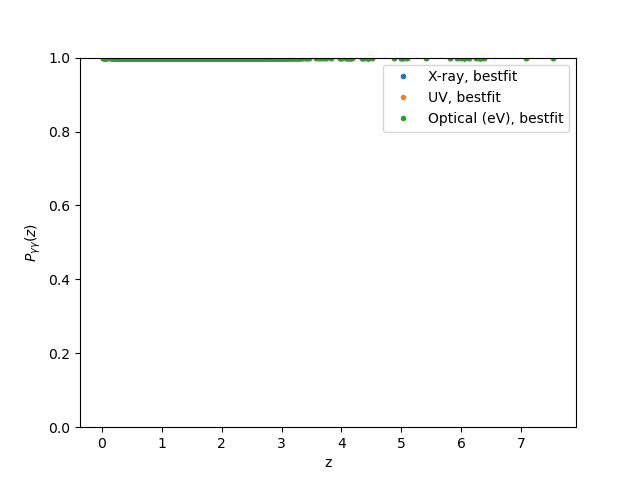

Text(0, 0.5, '$P_{\\gamma\\gamma}(z)$')

In [27]:
plt.subplots()
#plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, 16x $g_{a\gamma}$,  4x $m_a$')
#plt.plot(qso_z_arr, 10**logPggUV_uptown_arr, '.', label='UV, 16x $g_{a\gamma}$, 4x $m_a$')
# plt.plot(qso_z_arr, 10**logPggX_0_arr, '.', label='X-ray, bestfit')
# plt.plot(qso_z_arr, 10**logPggUV_0_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, bestfit')
plt.plot(qso_z_arr, 10**logPggUV_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 10**logPggOptical_arr, '.', label='Optical (eV), bestfit')
plt.ylim(0,1)
plt.legend()
plt.xlabel('z')
plt.ylabel(r"$P_{\gamma\gamma}(z)$")

<IPython.core.display.Javascript object>


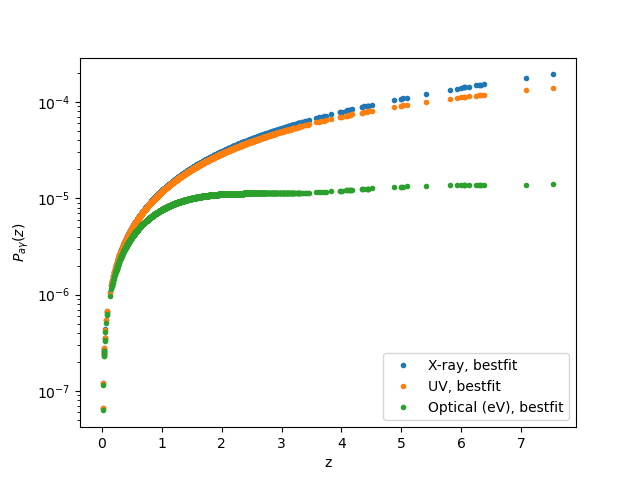

In [28]:
plt.subplots()
#plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, 16x $g_{a\gamma}$,  4x $m_a$')
#plt.plot(qso_z_arr, 10**logPggUV_arr, '.', label='UV, 16x $g_{a\gamma}$, 4x $m_a$')
# plt.plot(qso_z_arr, 10**logPggX_0_arr, '.', label='X-ray, bestfit')
# plt.plot(qso_z_arr, 10**logPggUV_0_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 1-10**logPggX_arr, '.', label='X-ray, bestfit')
plt.plot(qso_z_arr, 1-10**logPggUV_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 1-10**logPggOptical_arr, '.', label='Optical (eV), bestfit')
#plt.ylim(0,1)
plt.legend()
plt.xlabel('z')
plt.ylabel(r"$P_{a\gamma}(z)$")
plt.yscale('log')

In [29]:
gamma_bf = 0.62760049
feature_arr = logPggX_arr-gamma_bf*logPggUV_arr
idx = qso_z_arr.argsort()
feature_ax.plot(qso_z_arr[idx], feature_arr[idx]-feature_arr[idx][-1], '-', label='axion') #, label='mod of UV-X-ray')

In [30]:
# crank up the mass and coupling
x = (10**logma*4, 10**logga*16, OmL, h0, -1, 0., qso_gamma, qso_beta, 0., 100., qso_delta)

(chi2, 
 _, 
 _, 
 _,
 _, 
 _,
 _, 
 _,
 _, 
 _, 
 _,
 _,
 logPggX_uptown_arr, 
 logPggUV_uptown_arr,
 logPggOptical_uptown_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              get_optical=True,
                              **quasars_kwargs)

<IPython.core.display.Javascript object>


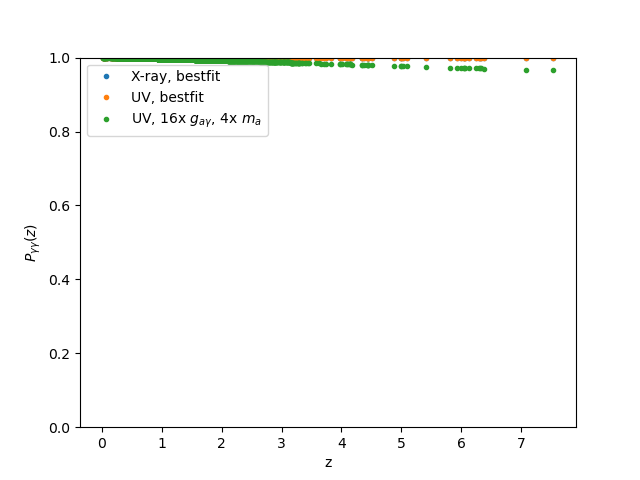

In [31]:
#
plt.subplots()
#plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, 16x $g_{a\gamma}$,  4x $m_a$')
#plt.plot(qso_z_arr, 10**logPggUV_arr, '.', label='UV, 16x $g_{a\gamma}$, 4x $m_a$')
# plt.plot(qso_z_arr, 10**logPggX_0_arr, '.', label='X-ray, bestfit')
# plt.plot(qso_z_arr, 10**logPggUV_0_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, bestfit')
plt.plot(qso_z_arr, 10**logPggUV_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 10**logPggUV_uptown_arr, '.', label='UV, 16x $g_{a\gamma}$, 4x $m_a$')
#plt.plot(qso_z_arr, 10**logPggOptical_arr, '.', label='Optical (eV), bestfit')
plt.ylim(0,1)
plt.legend()
plt.xlabel('z')
plt.ylabel(r"$P_{\gamma\gamma}(z)$")
plt.savefig('plots/photon_survival.pdf')

# axion v pantheon

In [32]:
def get_pan_error_bar(logma, logga, OmL, h0, color, M0=None, label=None):
    #x = (10**logma, 10**logga, OmL, h0, -1, 0., -19.3)
    
    
    if M0 is None:
        x = (10**logma, 10**logga, OmL, h0, -1, 0.)        
        (chi2, dm_th_pan_arr, dm_exp_pan_arr, ddm_exp_pan_arr, z_pan_arr, M0) \
        = ch.chi2_Pantheon(x, data=pan_data, vectorize=True, 
                           M0_low=-21.,
                           M0_up=-18.,
                           full_output=True,
                           **pan_kwargs)
    else:
        x = (10**logma, 10**logga, OmL, h0, -1, 0., M0)
        (chi2, dm_th_pan_arr, dm_exp_pan_arr, ddm_exp_pan_arr, z_pan_arr) \
        = ch.chi2_Pantheon(x, data=pan_data, vectorize=True, 
                         full_output=True,
                         **pan_kwargs)
            


    
    # bin pantheon

    # TODO: bin it, digitize qso_z_arr

    z_bin_pan_arr = []
    dm_bin_pan_arr = []
    ddm_bin_pan_arr = []
    digi = np.digitize(z_pan_arr, bins_pan)

    # average each z bin
    for i,_ in enumerate(bins_pan):
        x_arr = z_pan_arr[digi==i]
        y_arr = dm_exp_pan_arr[digi==i]
        dy_arr = ddm_exp_pan_arr[digi==i]

        # TODO: adding 0.02 from M posterior
        ybar, dybar = binning(y_arr, dy_arr, delta=0.)
        zbar, _ = binning(x_arr, dy_arr, 0.)

        z_bin_pan_arr.append(zbar)
        dm_bin_pan_arr.append(ybar)
        ddm_bin_pan_arr.append(dybar)

    z_bin_pan_arr = np.array(z_bin_pan_arr)
    dm_bin_pan_arr = np.array(dm_bin_pan_arr)
    ddm_bin_pan_arr = np.array(ddm_bin_pan_arr)


    # plot out distance measure
    x, yth = zip(*sorted(zip(z_pan_arr, dm_th_pan_arr)))
    x, yth = np.array(x), np.array(yth)
    dm_th_bin_pan_arr = np.interp(z_bin_pan_arr, x, yth)


    # residual plot without being normalized to sigma
    residual_pan_ax.errorbar(z_bin_pan_arr, 
                         (dm_th_bin_pan_arr-dm_bin_pan_arr), #th-exp
                         [0]*len(dm_th_bin_pan_arr), 
                         fmt=color+'.', 
                         ecolor=color, 
                         #label='axion best fit', 
                         linewidth=1, zorder=11)
    if label is not None:
        print(label)
        label = label+',M0=%.2f' %M0
    residual_pan_ax.errorbar(z_bin_pan_arr, 
                         (dm_th_bin_pan_arr-dm_bin_pan_arr), #th-exp
                         [0]*len(dm_th_bin_pan_arr), 
                         fmt=color+'-', 
                         ecolor=color, 
                         label=label,
                         linewidth=1, zorder=11)
    residual_pan_ax.fill_between(z_bin_pan_arr, 
                                 -ddm_bin_pan_arr,
                                 ddm_bin_pan_arr, 
                                 alpha=0.2,
                                 color='k')
    
    # check binned chi2
    
    counter = 0
    chi2_bin = 0.
    for i, _ in enumerate(dm_th_bin_pan_arr):
        chi2_i = (dm_th_bin_pan_arr[i]-dm_bin_pan_arr[i])**2/ddm_bin_pan_arr[i]**2
        
        if np.isnan(chi2_i):
            counter += 1
            continue
        
        chi2_bin += chi2_i
    #chi2_bin = np.sum((dm_th_bin_pan_arr-dm_bin_pan_arr)**2/ddm_bin_pan_arr**2)

    print('M0=%.2f, ln(ma*eV)=%.2f, ln(ga*GeV)=%.2f' %(M0, logma, logga))
    print('chi2=', chi2)
    print('chi2 using binned data:', chi2_bin)
    print("sanity check: there are %d nan's inside the array" %counter )
    print('\n\n')

    return z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr

In [63]:
ch.use_loglkl = True

<IPython.core.display.Javascript object>


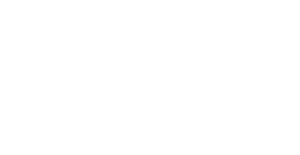

In [62]:
residual_pan_fig, residual_pan_ax = plt.subplots()
plt.title(r'The (unnormalized) residual using PAN data$')
plt.ylabel('$\mu^{th}-\mu^{exp}$')
plt.xlabel('$z$')
plt.close()


In [35]:
# # test M0 fit
# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
# = np.array([  0.65861254,   0.67443488, -14.44607915, -9.97, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])
# z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C3', M0=M0)

# # test M0 fit
# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
# = np.array([  0.65861254,   0.67443488, -14.44607915, -9.97, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])
# z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C3', M0=None)

# pass

In [36]:
# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
# = np.array([  0.65861254,   0.67443488, -14.44607915, -10.42702458, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])
# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
# = np.array([  0.65861254,   0.67443488, -14.44607915, -11.42702458, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])
# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
# = np.array([  0.65861254,   0.67443488, -14.44607915, -11., -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])

# test diff mass

OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
= np.array([  0.65861254,   0.67443488, -12.44607915, -9.97, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C0', M0=M0)


OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
= np.array([  0.65861254,   0.67443488, -13.44607915, -9.97, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C1', M0=M0)

OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
= np.array([  0.65861254,   0.67443488, -14.44607915, -9.97, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C2', M0=M0)

M0=-19.41, ln(ma*eV)=-12.45, ln(ga*GeV)=-9.97
chi2= 1030.5259931129685
chi2 using binned data: 120.59353995358644
sanity check: there are 2 nan's inside the array



M0=-19.41, ln(ma*eV)=-13.45, ln(ga*GeV)=-9.97
chi2= 1077.6538893932088
chi2 using binned data: 185.85339427279933
sanity check: there are 2 nan's inside the array



M0=-19.41, ln(ma*eV)=-14.45, ln(ga*GeV)=-9.97
chi2= 11952.91610123911
chi2 using binned data: 11787.396836540218
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2
<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2
<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


In [64]:
# test diff mass, fit M0


OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -11.99517132,  -15.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C4', label='ma+ ga-')


OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -11.99517132,  -9.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C0', label='ma+')


# bf point from run 052
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -12.99517132,  -9.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C1', label='bf')


OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -13.5,  -9.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C2', label='ma-')


OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -14.5,  -9.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C3', label='ma--')


<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


ma+ ga-
M0=-19.41, ln(ma*eV)=-12.00, ln(ga*GeV)=-15.98
chi2= -1168.3578295448992
chi2 using binned data: 122.05287428878313
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


ma+
M0=-19.41, ln(ma*eV)=-12.00, ln(ga*GeV)=-9.98
chi2= -1168.357761111683
chi2 using binned data: 122.05291832374334
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


bf
M0=-19.41, ln(ma*eV)=-13.00, ln(ga*GeV)=-9.98
chi2= -1167.5674338105175
chi2 using binned data: 122.60535807760309
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


ma-
M0=-19.47, ln(ma*eV)=-13.50, ln(ga*GeV)=-9.98
chi2= -1120.0460386020902
chi2 using binned data: 208.32237640883426
sanity check: there are 2 nan's inside the array



ma--
M0=-19.84, ln(ma*eV)=-14.50, ln(ga*GeV)=-9.98
chi2= -1144.1015000580624
chi2 using binned data: 140.52660600164654
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


In [65]:
# varying ga

# # decrease ga
# OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
# tuple([0.68421044,   0.674853  , -12.99517132,  -11.97781015, 0.62568118,   7.64944235,   0.22611939])
# z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C0', label='ga--')


# decrease ga
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -12.99517132,  -10.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C1', label='ga-')


# bf from run 052
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -12.99517132,  -9.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C2', label='bf')


# increase ga
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -12.99517132,  -8.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C3', label='ga+')


# increase ga
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -12.99517132,  -7.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C4', label='ga++')


<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


ga-
M0=-19.41, ln(ma*eV)=-13.00, ln(ga*GeV)=-10.98
chi2= -1168.3503243111093
chi2 using binned data: 122.0577907871217
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


bf
M0=-19.41, ln(ma*eV)=-13.00, ln(ga*GeV)=-9.98
chi2= -1167.5674338105175
chi2 using binned data: 122.60535807760309
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


ga+
M0=-19.47, ln(ma*eV)=-13.00, ln(ga*GeV)=-8.98
chi2= -1123.2403264833752
chi2 using binned data: 178.78238847633824
sanity check: there are 2 nan's inside the array



ga++
M0=-19.78, ln(ma*eV)=-13.00, ln(ga*GeV)=-7.98
chi2= -726.7681999440142
chi2 using binned data: 706.2571267288611
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


In [66]:
### Pantheon error bar

# compare bf QSO, bf QSO w/o axion, bf QSO+PAN, 


# from run 052
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -12.99517132,  -9.97781015, 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C0', label='QSO bf')

# kill ga
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68421044,   0.674853  , -12.99517132,  -18., 0.62568118,   7.64944235,   0.22611939])
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C1', label='QSO bf (no axion)')

# run 055, no island
OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta0, qso_delta \
= np.array([  0.65861254,   0.67443488, -14.44607915, -13.42702458, -19.41119979, 147.103858  ,   0.66339303,   6.36325992,  0.22929123])
[  0.65861254,   0.67443488, -14.44607915, -13.42702458,
       -19.41119979, 147.103858  ,   0.66339303,   6.36325992,
         0.22929123]
z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C2', M0=M0, label='QSO+PAN best fit')


<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


QSO bf
M0=-19.41, ln(ma*eV)=-13.00, ln(ga*GeV)=-9.98
chi2= -1167.5674338105175
chi2 using binned data: 122.60535807760309
sanity check: there are 2 nan's inside the array



QSO bf (no axion)
M0=-19.41, ln(ma*eV)=-13.00, ln(ga*GeV)=-18.00
chi2= -1168.3578295448992
chi2 using binned data: 122.05287428878313
sanity check: there are 2 nan's inside the array



QSO+PAN best fit
M0=-19.41, ln(ma*eV)=-14.45, ln(ga*GeV)=-13.43
chi2= -1175.057136345669
chi2 using binned data: 120.59336766989486
sanity check: there are 2 nan's inside the array





<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2
<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


In [40]:
# OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
# tuple([0.68421044,   0.674853  , -14.99517132,  -9.97781015, 0.62568118,   7.64944235,   0.22611939])
# z_bin_pan_arr, dm_th_bin_pan_arr, dm_bin_pan_arr, ddm_bin_pan_arr = get_pan_error_bar(logma=logma, logga=logga, OmL=OmL, h0=h0, color='C4')


In [41]:
residual_pan_ax.set_xscale('linear')

<IPython.core.display.Javascript object>


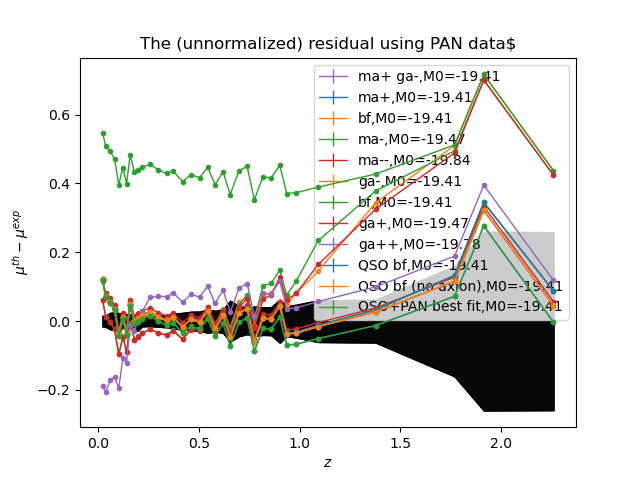

In [42]:
residual_pan_ax.legend()
residual_pan_fig

# $\beta(z)$ fit

In [43]:
# finding the best fit point

In [44]:
# (bf_chi2,
#  x_mesh,
#  y_mesh,
#  chi2_mins,
#  idx_mins_global,
#  x_arr, y_arr,
#  delta_arr,
#  _,
#  pts, 
#  blobs) = parse(directory="../quasars_betaz/chains/run049_betaz_two_betas",   
#                     chain_name="chain_1.h5",
#                     x_name="OmL",
#                     y_name="h0",
#                     bins=10)


# pts[363288]
# array([0.68020187, 0.67346292, 0.61895969, 7.69938118, 7.81716552,
#        1.64706455, 0.2258213 ])
# variables scanned: ['OmL', 'h0', 'qso_gamma', 'qso_beta0', 'qso_beta1', 'qso_z0', 'qso_delta']


In [45]:
ch.use_loglkl=True

In [46]:
# bestfit of run049, QSO + Planck prior (wa fixed to the wrong value, -1)
# OmL, h0, logma, logga, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delta = \
# tuple([0.68020187, 0.67346292, -15, -15, 0.61895969, 7.69938118, 7.81716552, 1.64706455, 0.2258213])
# x = (10**logma, 10**logga, OmL, h0, -1, -1, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delta)

# run053
OmL, h0, logma, logga, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delta = \
tuple([0.68198781, 0.674164, -18, -18,  0.61636127, 7.7624295 , 7.88005199, 1.64688024, 0.22597459])
x = (10**logma, 10**logga, OmL, h0, -1, 0., qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delta)



(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.3
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# # check pantheon chi2:
# # (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
# # x = (_, _, h0, a2, a3, a4, M0)
# print("Pantheon -2log(likelihood):", ch.chi2_Pantheon(x,
#                                                       data=pan_data,
#                                                         vectorize=True,
#                                                        **pan_kwargs))



quasars -2log(likelihood): -149.47205022397085


In [47]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
# dm binned
dm_ax.errorbar(z_bin_arr+0.01, dm_bin_arr, ddm_bin_arr, 
               fmt='k.', 
               ecolor='k', 
               label='exp binned beta(z), $z$ shifted by 0.01',
               linewidth=1,
               zorder=10)

# distance measure plot
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, 'C3-', zorder=10, label=r'$\beta(z)$ bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
# residual3_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
#                      fmt='.', 
#                      ecolor='C0',
#                      label='exp', 
#                      linewidth=1, 
#                      zorder=10, 
#                      alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
# residual3_ax.errorbar(z_bin_arr, 
#                      (y_bin-dm_bin_arr)/ddm_bin_arr, 
#                      [0]*len(y_bin), 
#                      fmt='r-', 
#                      ecolor='r', 
#                      label='beta(z) best fit', linewidth=1, zorder=11)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='-', 
                     #ecolor='r', 
                     label='beta(z) best fit', linewidth=1, zorder=11)

#residual2_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
#residual2_ax.set_title('axion bestfit w/ PAN+QSO')


# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='C2-', 
                     ecolor='C2', 
                     label='beta(z) best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')



# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr+0.06, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     #[0]*len(y_bin), 
                     fmt='.',
                     #fmt='C2-', 
                     #ecolor='C2', 
                     label='LCDM-beta(z) data, $\Delta z=0.06$', 
                     linewidth=1, zorder=11)
#residual_LCDM_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')


<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [48]:
# feature figure
z_arr = np.linspace(0, 8, 1000)
feature_arr = np.zeros_like(z_arr)
feature_arr[z_arr<qso_z0] = qso_beta0
feature_arr[z_arr>=qso_z0] = qso_beta1
feature_ax.plot(z_arr, feature_arr-feature_arr[-1], label=r"$\beta(z)$")

# $w_0-w_a$ fit

In [49]:
# w0wa run (run050)
# array([0.68430953, 0.67342347, 0.26779022, 0.99595991, 0.58335726,
#        8.60356001, 0.22446411])
#del(logma)
#del(logga)
OmL, h0, w0, wa, qso_gamma, qso_beta0, qso_delta = \
tuple([0.68430953, 0.67342347, 0.26779022, 0.99595991, 0.58335726,
       8.60356001, 0.22446411])

x = (10**-15, 10**-16, OmL, h0, w0, wa, qso_gamma, qso_beta0, 5., 50., qso_delta)



(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.3
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# # check pantheon chi2:
# # (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
# # x = (_, _, h0, a2, a3, a4, M0)
# print("Pantheon -2log(likelihood):", ch.chi2_Pantheon(x,
#                                                       data=pan_data,
#                                                         vectorize=True,
#                                                        **pan_kwargs))


quasars -2log(likelihood): -165.49212175862033


In [50]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
# dm binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, 
               fmt='C4.', 
               ecolor='C4', 
               label='exp binned w0-wa',
               linewidth=1,
               zorder=10)

# distance measure plot
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, 'C4-', zorder=10, label=r'$w_0-w_a$ bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
# residual3_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
#                      fmt='.', 
#                      ecolor='C0',
#                      label='exp', 
#                      linewidth=1, 
#                      zorder=10, 
#                      alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
# residual3_ax.errorbar(z_bin_arr, 
#                      (y_bin-dm_bin_arr)/ddm_bin_arr, 
#                      [0]*len(y_bin), 
#                      fmt='r-', 
#                      ecolor='r', 
#                      label='beta(z) best fit', linewidth=1, zorder=11)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='-', 
                     #ecolor='r', 
                     label=r'$w_0-w_a$ best fit', linewidth=1, zorder=11)

#residual2_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
#residual2_ax.set_title('axion bestfit w/ PAN+QSO')


# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='C4-', 
                     ecolor='C4', 
                     label=r'$w_0-w_a$ best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')


# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr-0.06, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     #[0]*len(y_bin), 
                     #fmt='C3-', 
                     #ecolor='C3', 
                     fmt='.',
                     label='LCDM-w0wa data, $\Delta z = -0.06$', 
                     linewidth=1, zorder=11)
#residual_LCDM_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')


<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [51]:
z_arr = np.linspace(0.001, 8, 1000)
mu_lcdm_arr = np.array([co.distance_modulus(z, 0.67, 0.68, w0=-1., wa=0.) for z in z_arr])
mu_w0wa_arr = np.array([co.distance_modulus(z, 0.67, 0.68, w0=0.43, wa=0.81) for z in z_arr])
gamma_bf = 0.58

#feature_ax.plot(z_arr, (mu_w0wa_arr - mu_lcdm_arr)/5.*2.*(gamma_bf-1))
feature_arr = (mu_w0wa_arr - mu_lcdm_arr)/5.*2.*(gamma_bf-1)
#feature_ax.plot(z_arr, feature_arr-feature_arr[-1], label=r"$w_0w_a$CDM")

<IPython.core.display.Javascript object>


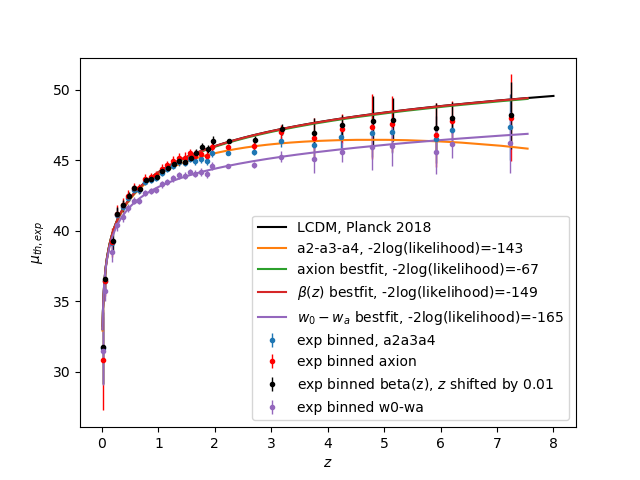

In [52]:
dm_ax.legend()
dm_fig

<IPython.core.display.Javascript object>


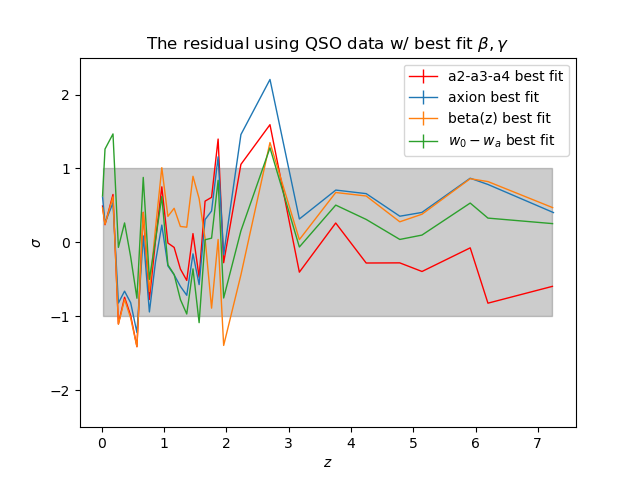

In [53]:
residual_ax.legend()
residual_ax.set_ylim(-2.5, 2.5)
residual_fig

<IPython.core.display.Javascript object>


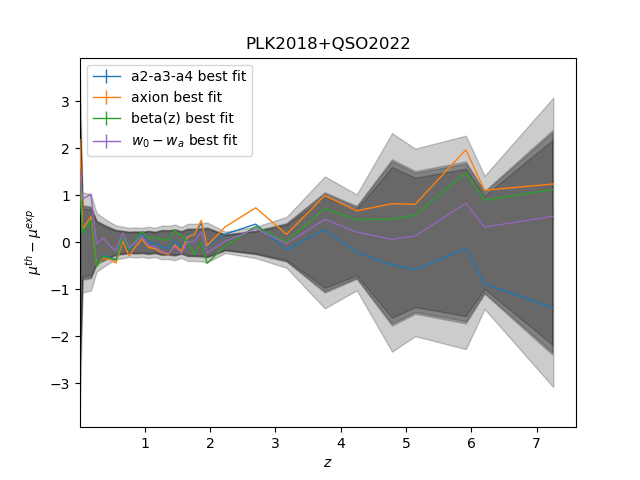

In [54]:
residual_unnorm_ax.legend()
#residual_unnorm_ax.set_xscale('symlog', linthresh=0.1)
#residual_unnorm_ax.set_xscale('log')
residual_unnorm_ax.set_xlim(0.01, 7.6)
#residual_unnorm_ax.set_xscale('logit')
residual_unnorm_ax.set_xscale('linear')
residual_unnorm_ax.set_title('PLK2018+QSO2022')
residual_unnorm_fig.savefig('./plots/residual.pdf')
residual_unnorm_fig

<IPython.core.display.Javascript object>


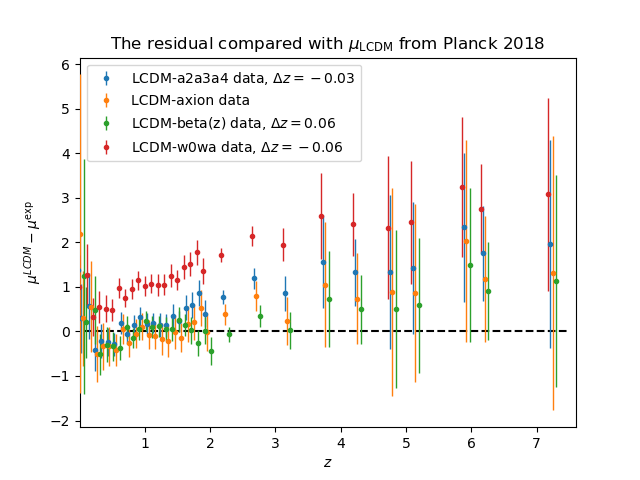

In [55]:
residual_LCDM_ax.legend(loc=2)
residual_LCDM_ax.set_xlim(0.01, 7.6)
residual_LCDM_ax.set_xscale('linear')
residual_LCDM_ax.set_ylabel(r'$\mu^{LCDM}-\mu^{\rm exp}$')
#residual_LCDM_ax.set_xscale('log')
#residual_LCDM_ax.set_xlabel(r'$\mu^{LCDM}-\mu^{\rm exp}$')

z_arr = np.linspace(-0.1, 7.5)
residual_LCDM_ax.plot(z_arr, [0.]*len(z_arr), 'k--')
residual_LCDM_fig.savefig('./plots/comparison_w_lcdm.pdf')
residual_LCDM_fig


<IPython.core.display.Javascript object>


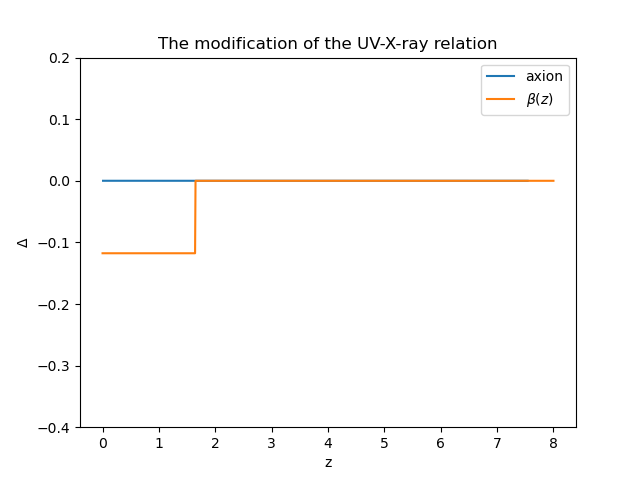

In [56]:
#feature_ax.set_ylim(-0.8, 0.5)
feature_ax.set_ylim(-0.4, 0.2)
feature_ax.legend()
feature_fig.savefig('plots/mod_of_UVX.pdf')
feature_fig

In [ ]:
# # finding bestfit point 
# # run on the cluster
# (bf_chi2,
#  x_mesh,
#  y_mesh,
#  chi2_mins,
#  idx_mins_global,
#  x_arr, y_arr,
#  delta_arr,
#  _,
#  pts, 
#  blobs) = parse(directory="../quasars_master/chains/run055_axion_planckrs_qso_pan_bao_zoomedin",    #"./chains/run027_loglkl_amp_fix_bigrange",
#                     chain_name="chain_1.h5",
#                     x_name="OmL",
#                     y_name="h0",
#                     bins=10)

In [ ]:
# pts[index from above]